In [1]:
import scda
import pprint
import logging
import os
import numpy as np

import matplotlib.pyplot as plt
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.linewidth'] = 1.
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['font.size'] = 13

scda.configure_log()

Populating the interactive namespace from numpy and matplotlib


In [2]:
#survey_dir = os.path.normpath("/astro/opticslab1/SCDA/Scripts/AMPL/april_survey01_10bw/")
survey_dir = os.path.expanduser("~/Box Sync/scda/april_survey01_15bw/")
os.chdir(survey_dir)
os.listdir(".")

['amplsrc',
 'april_survey01_15bw_ntz.csv',
 'april_survey01_15bw_ntz_2016-04-20.csv',
 'april_survey01_15bw_ntz_2016-04-20.pkl',
 'april_survey01_15bw_ntz_newmetrics.csv',
 'crontab_april_survey01_15bw_ntz_2016-04-20',
 'crontab_april_survey01_15bw_ntz_2016-04-20~',
 'crontab_april_survey01_15bw_ntz_2016-04-20~~',
 'logs',
 'newcronfile',
 'queuefill.log',
 'scda_queuefill.py',
 'slurmsh',
 'solutions']

In [3]:
#survey_archive_fname = "april_survey01_10bw_kstlaurent_2016-04-26.pkl"
survey_archive_fname = "april_survey01_15bw_ntz_2016-04-20.pkl"

In [4]:
survey_archive = scda.load_design_param_survey(survey_archive_fname)
setattr(survey_archive, 'ampl_submission_status', survey_archive.submission_status) # fix for changed attribute name

In [22]:
survey_archive.get_metrics(verbose=False)

In [21]:
# Copy metrics to missing/failed coronagraph
survey_archive.coron_list[3].eval_metrics = survey_archive.coron_list[0].eval_metrics

In [9]:
survey_archive.coron_list[50].fileorg

{'FPM dir': '../InputMasks/FPM',
 'FPM fname': '../InputMasks/FPM/FPM_quart_occspot_M060.dat',
 'LDZ fname': '../InputMasks/LS/LDZ_quart_ann20D80_clear_Tol05_N0125.dat',
 'LS dir': '../InputMasks/LS',
 'LS fname': '../InputMasks/LS/LS_quart_ann20D80_clear_N0125.dat',
 'TelAp dir': '../InputMasks/TelAp',
 'TelAp fname': '../InputMasks/TelAp/TelAp_quart_hex2X025cobs1_N0125.dat',
 'ampl src dir': 'amplsrc',
 'ampl src fname': 'amplsrc/APLC_quart_hex2X025cobs1_N0125_FPM400M060_LSann20D80clearTol05s30_Img100C_35DA100_BW15Nlam05fpres2_linbarpre1.mod',
 'eval dir': '.',
 'job name': 'APLC_quart_hex2X025cobs1_N0125_FPM400M060_LSann20D80clearTol05s30_Img100C_35DA100_BW15Nlam05fpres2_linbarpre1',
 'log dir': 'logs',
 'log fname': 'logs/APLC_quart_hex2X025cobs1_N0125_FPM400M060_LSann20D80clearTol05s30_Img100C_35DA100_BW15Nlam05fpres2_linbarpre1.log',
 'slurm dir': 'slurmsh',
 'slurm fname': 'slurmsh/APLC_quart_hex2X025cobs1_N0125_FPM400M060_LSann20D80clearTol05s30_Img100C_35DA100_BW15Nlam05fpres2

In [18]:
survey_archive.write_spreadsheet(csv_fname="april_survey01_15bw_ntz_newmetrics.csv")

In [20]:
test_coron = survey_archive.coron_list[50]

In [13]:
Nlam = 3
intens_polychrom, seps, radial_intens_polychrom = test_coron.get_onax_psf(Nlam=Nlam)

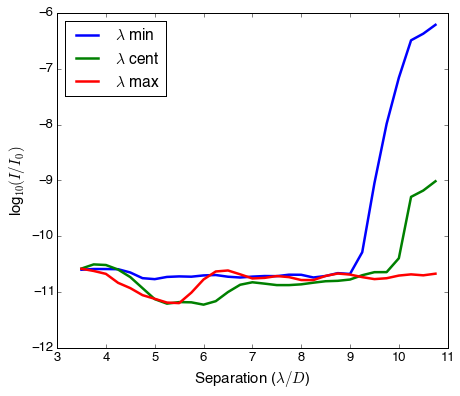

In [14]:
plt.figure(figsize=(7,6))
plt.plot(seps,np.log10(radial_intens_polychrom[0]),'b')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam/2]),'g')
plt.plot(seps,np.log10(radial_intens_polychrom[Nlam-1]),'r')
plt.legend([r'$\lambda$ min',r'$\lambda$ cent','$\lambda$ max'],loc='upper left')
plt.ylabel(r'log$_{10}(I/I_0)$',fontsize=15)
plt.xlabel(r'Separation ($\lambda/D$)',fontsize=15)

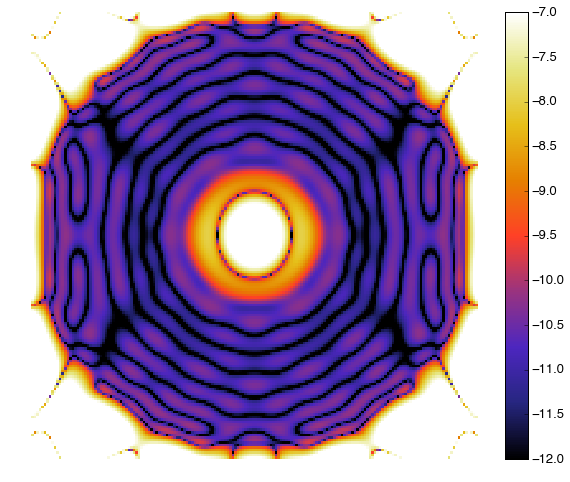

In [15]:
plt.figure(figsize=(10,8))
plt.imshow(np.log10(intens_polychrom[Nlam/2]), cmap='CMRmap',vmin=-12,vmax=-7)
plt.colorbar()
p=plt.axis('off')